Nom de l'élève : ....

# Activité numérique : Force et variation du vecteur vitesse
## 1. Problématique  
Ce programme permet de représenter les positions successives du centre d'un mobile autoporteur issues d'un pointage vidéo ainsi que les vecteurs vitesse et les vecteurs variation de vitesses.

__Objectif :__ Tester la relation approchée entre la variation du vecteur vitesse entre deux instants voisins et la somme des forces appliquées au système. 
__Capacité numérique :__  Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d'un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.

## 2. Travail demandé
Vous devrez :
- lire ce _notebook_ et exécuter au fur et à mesure toutes les cellules de code (taper au clavier <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>).
- analyser les résultats obtenus
- répondre aux questions en sélectionnnant avec la souris la cellule textuelle située juste en dessous de la question afin de pouvoir y rédiger votre réponse.
- modifier certaines lignes du code quand cela vous sera demandé.

### __<font style="color:#FF0000;">Attention :</font>__  
<B><font style="color:#FF0000;"> Il est important de sauvegarder votre travail très régulièrement. Pour cela il faut cliquer sur le bouton représentant une disquette qui se trouve en haut à gauche dans la barre de boutons (Créer  une nouvelle sauvegarde).</font></B>

## 3. Vidéo du mouvement du mobile autoporteur
Visionner la vidéo de l'enregistrement du mouvement d'un mobile autoporteur en exécutant la cellule de code suivante (taper au clavier <kbd>SHIFT</kbd>+<kbd>ENTER</kbd>) et en lancant la lecture. Le mobile se déplace sans frottement sur une table horizontale. Il est soumis à l'action d'un ressort accroché par un fil inextensible à un point fixe. Il est lancé avec une certaine vitesse initiale.  
On a réalisé le pointage des positions au cours du temps du centre M du mobile autoporteur. Le résultat de ce pointage à été enregistré dans le fichier "Pointage_mobile.txt".

In [9]:
%%HTML
<center>
<video width="640" height="480" controls>
  <source src="Mobile_autoporteur.mp4" type="video/mp4">
</video>
</center>

## 3. Vecteur variation de vitesse

### Document 1 : Rappel sur le vecteur variation de vitesse :
![Vecteur variation de vitesse](Images/Variation_vitesse.jpg)  

La cellule de code suivante va calculer le vecteur variation de vitesse au cours du mouvemement du mobile.   

__Question 1__ : Repérer dans la cellule de code ci-dessous les lignes qui permettent de calculer les coordonnées du vecteur vitesse au point $M_{i}$ en utilisant la formule approchée suivante : $\vec{v}_{i}=\frac{\overrightarrow{M_{i-1}M_{i+1}}  }{t_{i+1}-t_{i-1}}  $

Recopier les lignes de codes ici.

__Question 2__ : Dans la cellule de code ci-dessous, compléter la ligne de code qui permet de calculer la coordonnée $\Delta v_{y}$ (deltaVy).  
Aide : suivre le modèle de la ligne de code qui calcule la coordonnée $\Delta v_{x}$ (deltaVx)

Une fois la modification réalisée, executer la cellule de code suivante et observer la graphique obtenu.

<IPython.core.display.Javascript object>


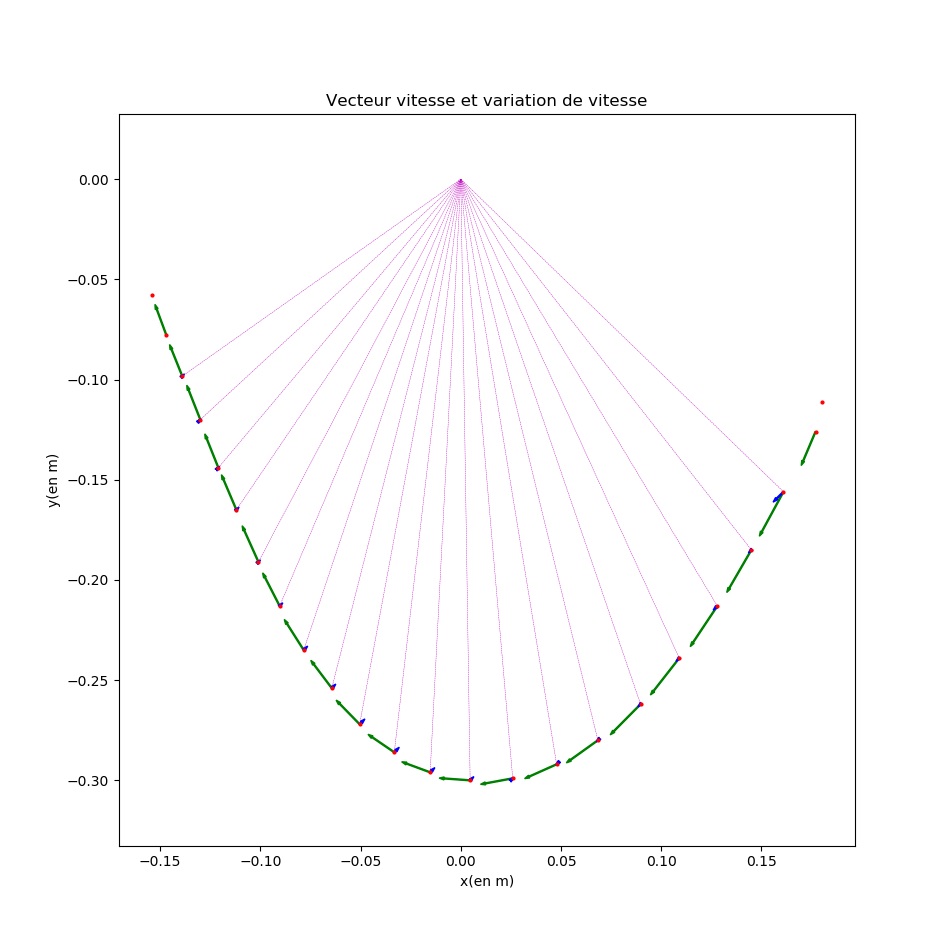

In [15]:
import matplotlib.pyplot as plt
from math import *
%matplotlib notebook

# Extraction des données du fichier texte de pointage, 
t,x,y=[],[],[] # définition de 3 listes vides pour les 3 variables t, x et y

# Ouverture du fichier texte avec la méthode with 
with open("Pointage_mobile.txt", "r") as fichierTexte:       
   # extraction des données du fichier ligne par ligne
    i=0
    for l in fichierTexte:          
        if i > 2 : # extraction des données à partir de la 3ème ligne du fichier
            # conversion en nombre des données d d'une ligne                        
            ti,xi,yi=[float(d) for d in l.replace(",",".").split(";")]            
            # ajout des données ti, xi et yi dans les listes t, x et y       
            t.append(ti), x.append(xi), y.append(yi)   
        i=i+1
        
# Option pour ne représenter qu'un vecteur vitesse tous les n points
# print("")
# print("Représenter :")
# n=int(input('- un vecteur vitesse tous les n points, n= '))
n=1

# Tracé des points de la trajectoire y=f(x)=======================================                   
# Initialisation de la figure, nom de la fenêtre de visualisation
plt.figure(1,figsize=(9.5,9.5))
plt.title('Vecteur vitesse et variation de vitesse') # titre 
plt.xlim(-0.160,0.185)
plt.ylim(-0.310,0.005)
plt.xlabel('x(en m)')              # légende de l'axe des abscisses
plt.ylabel('y(en m)')              # légende de l'axe des abscisses
plt.axis('equal')                  # même échelle sur les axes 

# Représentation des points de coordonnées (x(t),y(t)),rouge'r',forme'o',taille 2
plt.plot(x,y,'ro',ms=2) 

                                            
# Calculs des coordonnées des vecteurs vitesse ===================================
# Définition de 2 listes pour les variables Vxi, Vyi    
Vx,Vy=[0],[0] # Premières valeurs nulles pour l'indice i=0 non utilisé
for i in range(1,len(t)-1) :     
    # Calcul de la coordonnée Vxi du vecteur vitesse Vi sur l'axe x au point n°i
    Vxi=(x[i+1]-x[i-1])/(t[i+1]-t[i-1])            
    Vx.append(Vxi) # ajout de la valeur Vxi à la liste Vx   
    
    # Calcul de la coordonnée Vyi du vecteur vitesse Vi sur l'axe y au point n°i
    Vyi=(y[i+1]-y[i-1])/(t[i+1]-t[i-1])            
    Vy.append(Vyi) # ajout de la valeur Vyi à la liste Vy    
    

# Représentation des vecteurs vitesse tous les n points ========================
for i in range(1,len(t)-1,n) :
    # Représente, au point d'indice i de coordonnées (x[i],y[i]), une flèche
    # de longueurs Vx[i]/20 sur l'axe x et Vy[i]/20 sur l'axe y    
    plt.arrow(x[i], y[i], Vx[i]/20, Vy[i]/20, width=0.0005,   
    length_includes_head="true",head_length=0.0025, head_width=0.0015, color='g')  
   
# Calculs des coordonnées des vecteurs variation de vitesse ======================
# Définition de 2 listes pour les variables deltaVx et deltaVy contenant 0,0  
# pour les indices i=0 et i=1 non utilisés
deltaVx,deltaVy=[0,0],[0,0] 
for i in range(2,len(t)-2) :                        
    # Calcul des coordonnées deltaVxi du vecteur variation de vitesse 
    # sur l'axe x au point n°i
    deltaVxi=Vx[i+1]-Vx[i-1]
    deltaVx.append(deltaVxi) # ajout de la valeur deltaVxi à la liste deltaVx
    
    # Calcul des coordonnées deltaVyi du vecteur variation de vitesse 
    # sur l'axe y au point n°i
    deltaVyi=Vx[i+1]-Vx[i-1]           ########### LIGNE A COMPLETER #################
    deltaVy.append(deltaVyi) # ajout de la valeur deltaVyi à la liste deltaVy

# Option pour ne représenter qu'un vecteur variation de vitesse tous les p points
# p=int(input('- un vecteur variation de vitesse tous les p points, p= '))
p=1 
# Représentation des vecteurs variation de vitesse =============================
for i in range(2,len(t)-2,p) :        
    # Représente, au point d'indice i de coordonnées (x[i],y[i]), une flèche
    # de longueurs deltaVx[i]/20 sur l'axe x et deltaVy[i]/20 sur l'axe y   
    plt.arrow(x[i], y[i], deltaVx[i]/20, deltaVy[i]/20,  width=0.0005,   
    length_includes_head="true",head_length=0.0025, head_width=0.0015, color='b') 
    
    # Représente un segment en pointillé de couleur magenta, d'épaisseur '0.3', 
    # joignant le point d'attache de l'ensemble fil + ressort au support 
    # de coordonnées (0,0) au centre du mobile autoporteur de coordonnées(xi,yi)   
    plt.plot([0, x[i]], [0, y[i]], 'm--', lw=0.3)       
 
plt.show()

__Question 3__ : Sur la figure 1, en quelle couleur sont représentés les vecteurs vitesse ? Et en quelle couleur sont représentés les vecteurs variation de vitesse ?

Répondre ici.

## 4. Relation entre le vecteur variation de vitesse et la force exercée par le ressort

### Document 2 : Force $\vec{F}$ exercée par un ressort :
La force $F$ exercée par le ressort est proportionnelle à l'allongement du ressort $l-l_{0}$ où $l_{0}$ est la longueur à vide du ressort :

$$F=k(l-l_{0})$$
où :  
- $k$ est la raideur du ressort exprimée en $N.m^{-1}$  
- $F$ en $N$  
- $l-l_{0}$ en m  
![Force exercée par un ressort](Images/Ressort.jpg)  

__Question 4__ : Indiquer la direction et le sens de la force  $\vec{F}$ exercée par le ressort sur le mobile autoporteur.

Répondre ici.

__Question 5__ : Comparer les directions de la force $\vec{F}$ du ressort aux directions des vecteurs variation de vitesse $\Delta \vec{v}$ du centre du mobile.

Répondre ici.

__Question 6__ : A la fin du mouvement, on peut observer sur la vidéo que le ressort n'est plus allongé. On peut aussi constater sur le graphique précédent que le mouvement du centre du mobile est rectiligne uniforme. Que peut-on dire alors de la force  $\vec{F}$ du ressort ainsi que du vecteur variation de vitesse $\Delta \vec{v}$ du centre du mobile ?

Répondre ici.

### Document 3 : Relation approchée entre le vecteur variation de vitesse et la somme des forces appliquées au système.

On a vu en classe de seconde qu'une force peut modifier le vecteur vitesse d'un système, plus ou moins fortement selon la masse de ce système.
Dans un référentiel donné, si un système de masse $m$ est soumis à une force $\vec{F}$, le vecteur variation de vitesse $\Delta\vec{v}$ de ce système pendant la durée _très courte_ $\Delta t$ et la force $\vec{F}$ sont reliés de façon approchée par :
$$\vec{F}=m\frac{\Delta \vec{v}}{\Delta t}$$
où :
- la valeur de $\vec{F}$ est en $N$
- $m$ est en $kg$
- la valeur de $\Delta \vec{v}$ est en $m.s^{-1}$ 
- $\Delta t$ est en $s$


__Question 7__ : D'après la relation donnée dans le document 3, les vecteurs $\vec{F}$ et $\Delta \vec{v}$ sont colinéaires et dans le même sens. Cette propriété est-elle exactement vérifiée sur la figure 1 ? Si, non proposer une explication.

Répondre ici.

__Question 8__ : D'après la relation du document 3, la valeur du vecteur variation de vitesse $\Delta\vec{v}$ est grande si la valeur de la force $\vec{F}$ est grande. Retrouve-on cette propriété en observant la figure 1 ? (Aide : utiliser le document 2)

Répondre ici.

### Vérification en valeur de la relation approchée $\vec{F}=m\frac{\Delta \vec{v}}{\Delta t}$  
La cellule de code suivante calcule pour chacune des positions du mobile les deux grandeurs $F$
et $m\frac{\Delta v}{\Delta t}$ afin de vérifier si elles sont égales.

<IPython.core.display.Javascript object>


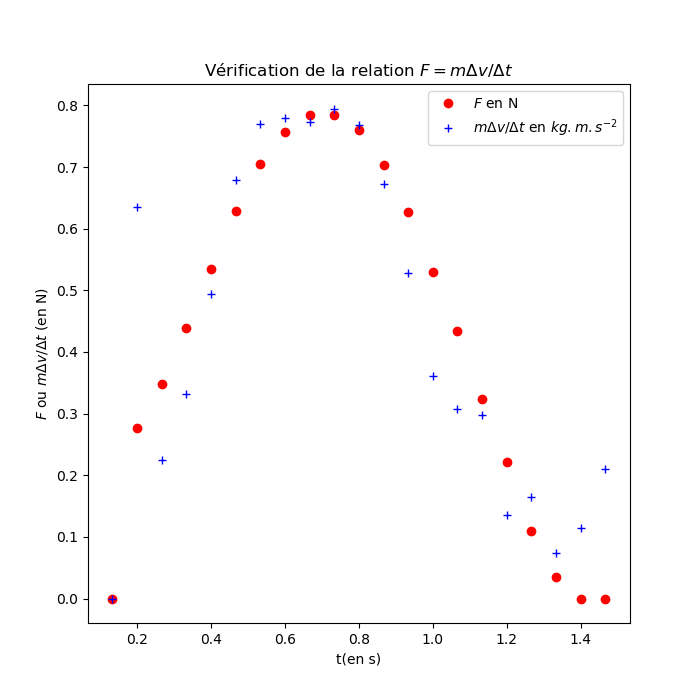

In [11]:
# Initialisation des données de l'enregistrement vidéo 
m=0.625      # valeur en kg de la masse du mobile autoporteur
k=6.7        # valeur de la constante de raideur du ressort en N.m-1
L0=0.183     # valeur de la longueur à vide en m du ressort + ficelle


deltaL=[0] 
F=[0]
deltaV=[0]
mdVsurdt=[0]
for i in range(2,len(t)-2) :   
    # Calcul de l'allongement du ressort : deltaL = L-L0 = (x^2+y^2)^0.5 - L0 
    deltaLi=max(0,sqrt(x[i]**2+y[i]**2)- L0)   # si l'allongement calculé est de signe négatif
    deltaL.append(deltaLi)                    # alors le ressort n'est pas tendu et deltaLi=0 
        
    # Calcul de la norme F de la force exercée par le ressort : F = k*deltaL
    Fi=k*deltaLi 
    F.append(Fi)     
    
    # Calcul de la norme deltaVi du vecteur variation de vitesse :  
    deltaVi=sqrt(deltaVx[i]**2+deltaVy[i]**2) # si l'allongement calculé est de signe négatif
    deltaV.append(deltaVi)
    
    # Calcul de m*deltaV/deltat noté (mdVsurdt)
    mdVsurdti=m*deltaVi/(t[i+1]-t[i-1]) 
    mdVsurdt.append(mdVsurdti)
        
plt.figure(2,figsize=(7,7))
plt.title('Vérification de la relation $F= m \Delta v / \Delta t $') # titre 
plt.xlabel('t(en s)')              # légende de l'axe des abscisses
plt.ylabel('$F$ ou $m \Delta v / \Delta t$ (en N)')              # légende de l'axe des abscisses
              
# Représentation des points de coordonnées (x(t),y(t)),rouge'r',forme'o',taille 2
plt.plot(t[2:-1],F,'ro',label='$F$ en N')
plt.plot(t[2:-1],mdVsurdt,'b+', label ='$m \Delta v / \Delta t$ en $kg.m.s^{-2}$')
plt.legend()
plt.show()   

__Question 9__ Après avoir exécuté la cellule de code précédente et analysé la figure 2, conclure sur la validité de la formule : $\vec{F}=m\frac{\Delta \vec{v}}{\Delta t}$

Répondre ici.

## Enregistrer ce notebook au format html

Tout d'abord, vérifiez que vous avez bien indiqué tout en haut du fichier votre nom.
Une fois que vous avez terminé de répondre aux questions, enregistrez ce notebook au format html en utilisant le menu `File` -> `Download as` -> `HTML (.html)` et envoyez le moi par Pronote en modifiant le nom du fichier html pour qu'il contienne votre nom.